In [1]:
pip install pandas numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


Mean Squared Error: 6605009.148356986


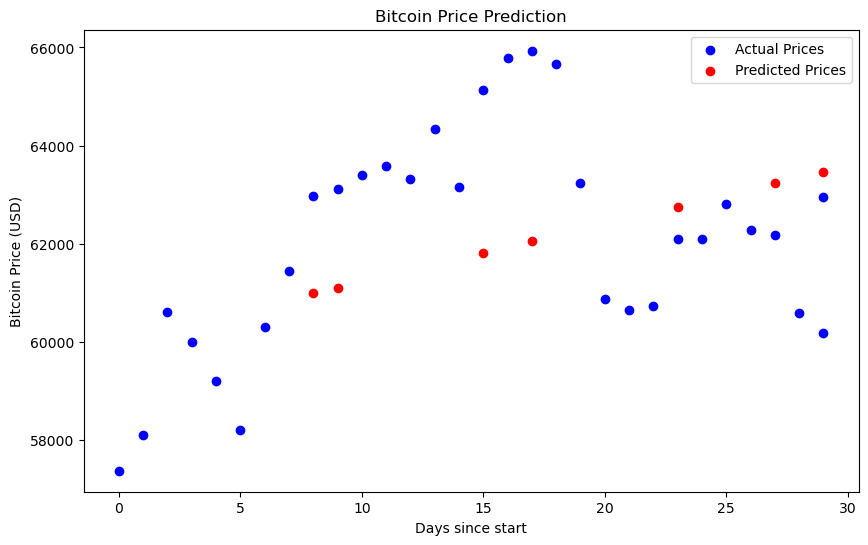

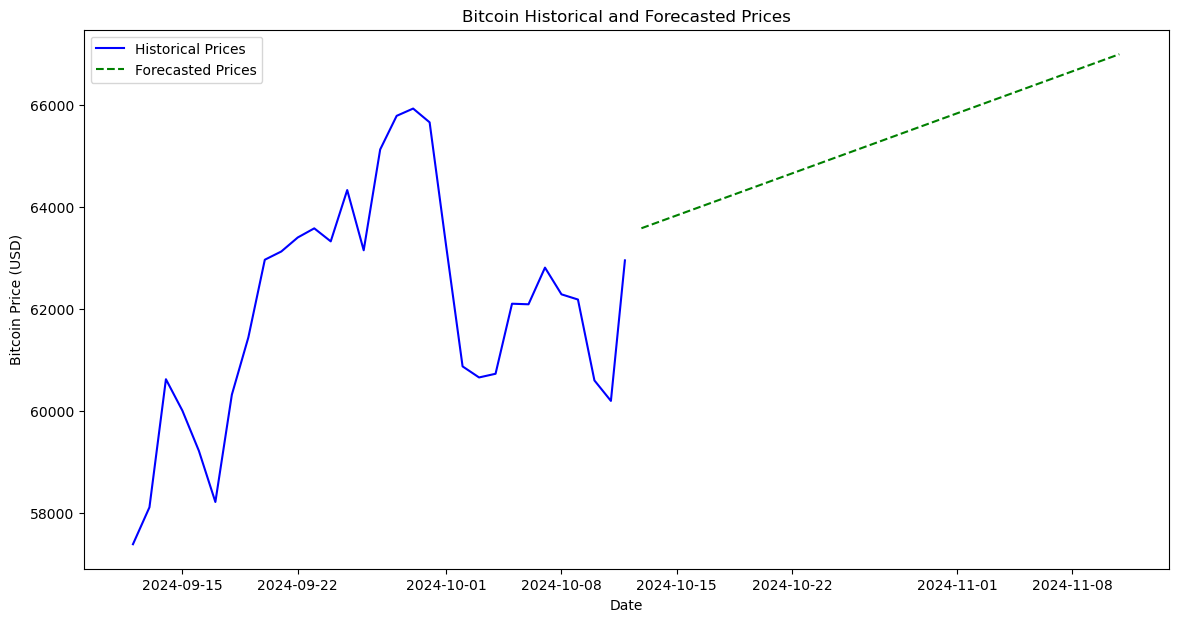

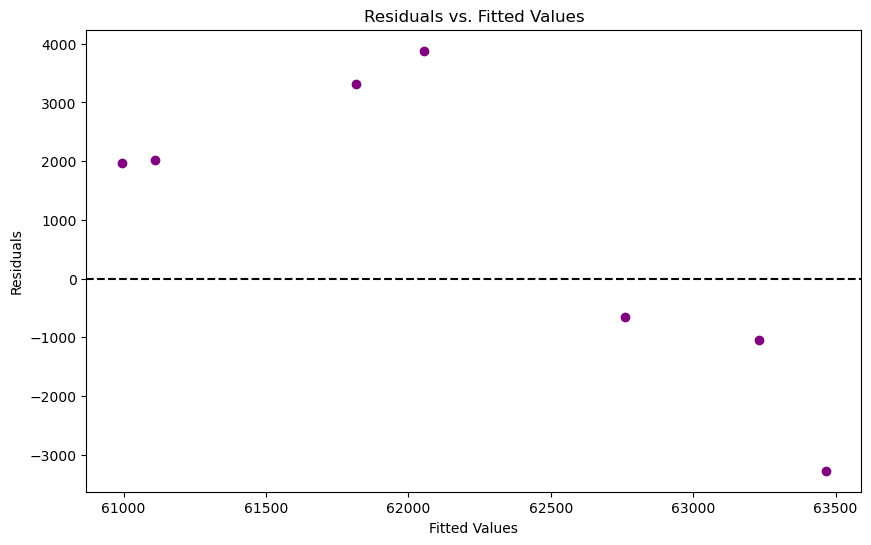

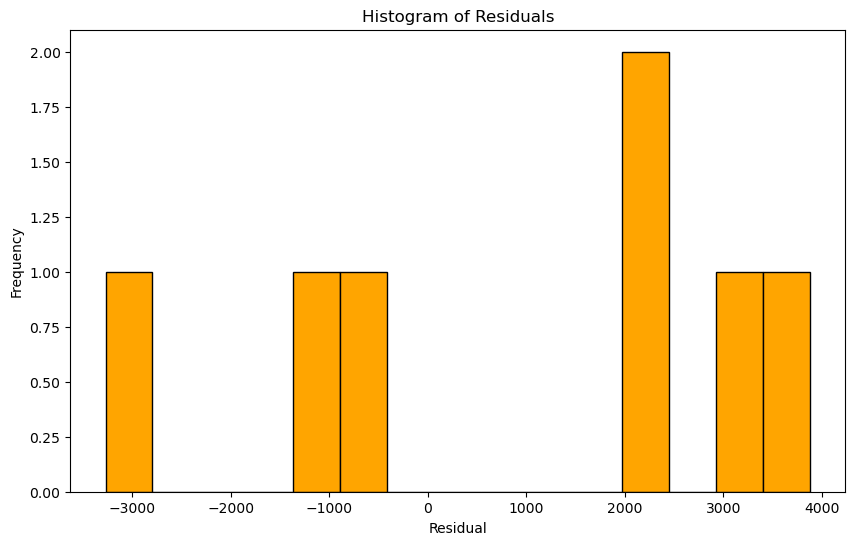

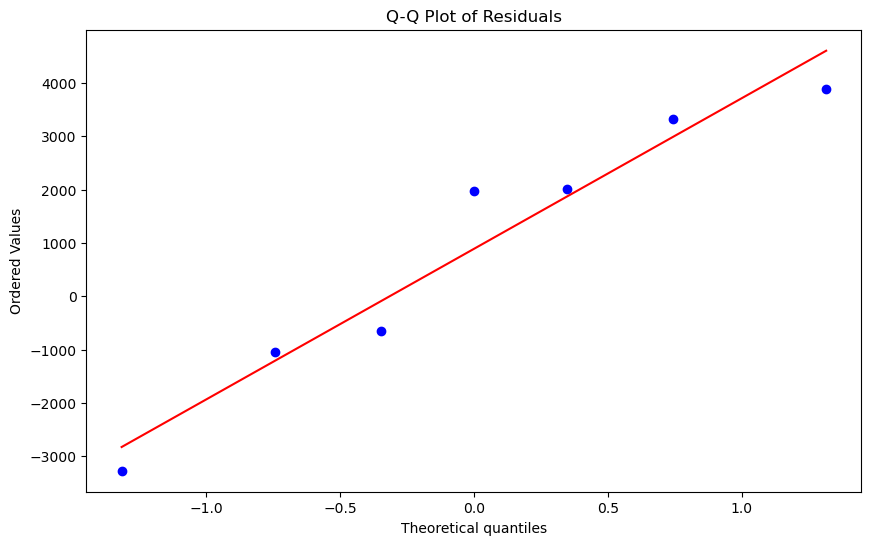

                     Predicted Price
2024-10-12 20:23:52     63584.497339
2024-10-13 20:23:52     63702.300944
2024-10-14 20:23:52     63820.104549
2024-10-15 20:23:52     63937.908154
2024-10-16 20:23:52     64055.711759
2024-10-17 20:23:52     64173.515364
2024-10-18 20:23:52     64291.318969
2024-10-19 20:23:52     64409.122573
2024-10-20 20:23:52     64526.926178
2024-10-21 20:23:52     64644.729783
2024-10-22 20:23:52     64762.533388
2024-10-23 20:23:52     64880.336993
2024-10-24 20:23:52     64998.140598
2024-10-25 20:23:52     65115.944203
2024-10-26 20:23:52     65233.747808
2024-10-27 20:23:52     65351.551413
2024-10-28 20:23:52     65469.355017
2024-10-29 20:23:52     65587.158622
2024-10-30 20:23:52     65704.962227
2024-10-31 20:23:52     65822.765832
2024-11-01 20:23:52     65940.569437
2024-11-02 20:23:52     66058.373042
2024-11-03 20:23:52     66176.176647
2024-11-04 20:23:52     66293.980252
2024-11-05 20:23:52     66411.783857
2024-11-06 20:23:52     66529.587461
2

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import requests

# Fetch Bitcoin historical data from CoinGecko
url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart'
params = {
    'vs_currency': 'usd',
    'days': '30',  # Change this to your desired range
    'interval': 'daily'
}

response = requests.get(url, params=params)
data = response.json()

# Convert to DataFrame
prices = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
prices['Date'] = pd.to_datetime(prices['timestamp'], unit='ms')
prices.set_index('Date', inplace=True)
prices['Close'] = prices['price']
prices = prices[['Close']]  # Keep only the 'Close' price

# Prepare the data for the model
prices['Days'] = (prices.index - prices.index[0]).days  # Create a column for days
X = prices[['Days']]  # Feature: number of days
y = prices['Close']   # Target: closing price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot 1: Scatter Plot of Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(prices['Days'], prices['Close'], color='blue', label='Actual Prices')
plt.scatter(X_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('Days since start')
plt.ylabel('Bitcoin Price (USD)')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()

# Plot 2: Time Series Plot with Historical and Forecasted Prices
# Predict future prices
future_days = pd.DataFrame({'Days': [prices['Days'].max() + i for i in range(1, 31)]})  # Next 30 days
future_prices = model.predict(future_days)

# Create future dates
future_dates = pd.date_range(start=prices.index[-1] + pd.Timedelta(days=1), periods=30)
predictions = pd.DataFrame(data=future_prices, index=future_dates, columns=['Predicted Price'])

# Combine historical and forecasted data
combined = pd.concat([prices, predictions])

# Plot the time series
plt.figure(figsize=(14, 7))
plt.plot(prices.index, prices['Close'], label='Historical Prices', color='blue')
plt.plot(predictions.index, predictions['Predicted Price'], label='Forecasted Prices', color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.title('Bitcoin Historical and Forecasted Prices')
plt.legend()
plt.show()

# Plot 3: Residuals vs. Fitted Values
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# Plot 4: Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=15, color='orange', edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Optional: Q-Q Plot of Residuals to Assess Normality
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Predict future price
# (This section remains the same as before)
future_days = pd.DataFrame({'Days': [prices['Days'].max() + i for i in range(1, 31)]})  # Create a DataFrame with named column
future_prices = model.predict(future_days)

# Display future predictions
future_dates = pd.date_range(start=prices.index[-1] + pd.Timedelta(days=1), periods=30)
predictions = pd.DataFrame(data=future_prices, index=future_dates, columns=['Predicted Price'])
print(predictions)